In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
df = pd.read_csv("H:/FinalCodeMD/FinalCode1/Dataset/AAPL.csv")

# Xem trước dữ liệu
print(df.head())


         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
1  2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2  2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
3  2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
4  2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   

      Volume  
0  142718700  
1  280258200  
2  358539800  
3  358532900  
4  220230600  


# 2. Exploratory Data Analysis

## 2.1

In [6]:
# Thống kê mô tả
print(df.describe())

# Kiểm tra các giá trị lớn nhất và nhỏ nhất
print("Ngày có giá đóng cửa cao nhất:", df[df['Close'] == df['Close'].max()])
print("Ngày có giá đóng cửa thấp nhất:", df[df['Close'] == df['Close'].min()])


             Open        High         Low       Close   Adj Close  \
count  184.000000  184.000000  184.000000  184.000000  184.000000   
mean   127.040245  129.918098  124.340381  127.352663  123.838032   
std     24.314449   24.577906   24.176736   24.356534   25.655569   
min     92.389999   93.769997   89.470001   90.519997   87.796822   
25%    108.882499  112.362499  106.152502  109.204998  105.301765   
50%    118.895000  120.865002  116.870003  119.190002  114.999730   
75%    144.935005  147.695000  143.227493  144.704994  143.039467   
max    180.289993  183.500000  177.619995  179.979996  179.979996   

             Volume  
count  1.840000e+02  
mean   1.910168e+08  
std    8.160281e+07  
min    3.839850e+07  
25%    1.273706e+08  
50%    1.744112e+08  
75%    2.207755e+08  
max    5.003630e+08  
Ngày có giá đóng cửa cao nhất:            Date        Open   High         Low       Close   Adj Close  \
179  2018-03-05  175.210007  180.0  174.270004  179.979996  179.979996   



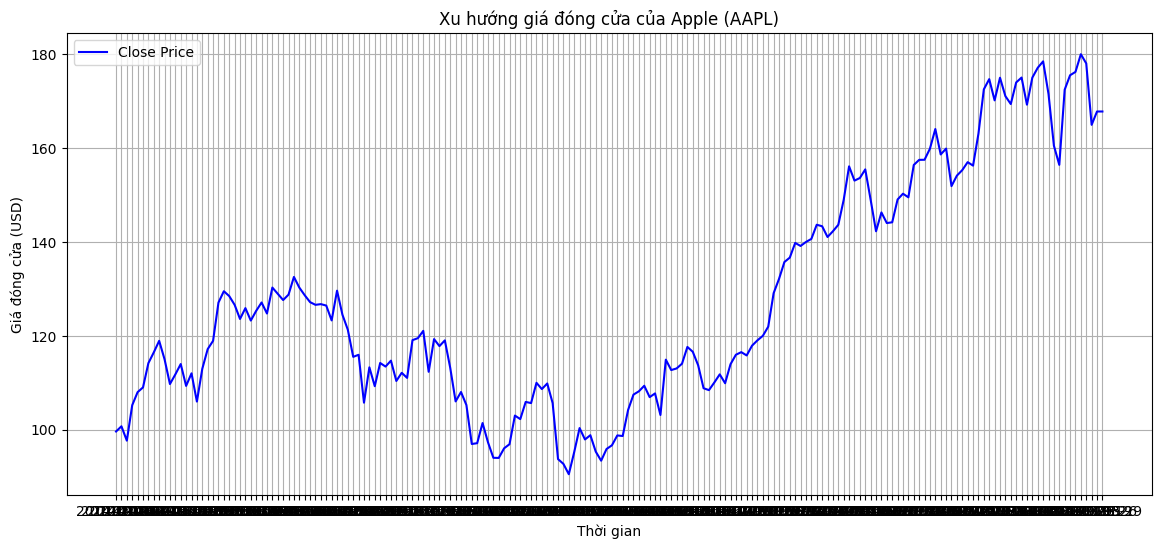

In [7]:
# Vẽ biểu đồ xu hướng giá đóng cửa theo thời gian
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title("Xu hướng giá đóng cửa của Apple (AAPL)")
plt.xlabel("Thời gian")
plt.ylabel("Giá đóng cửa (USD)")
plt.legend()
plt.grid(True)
plt.show()


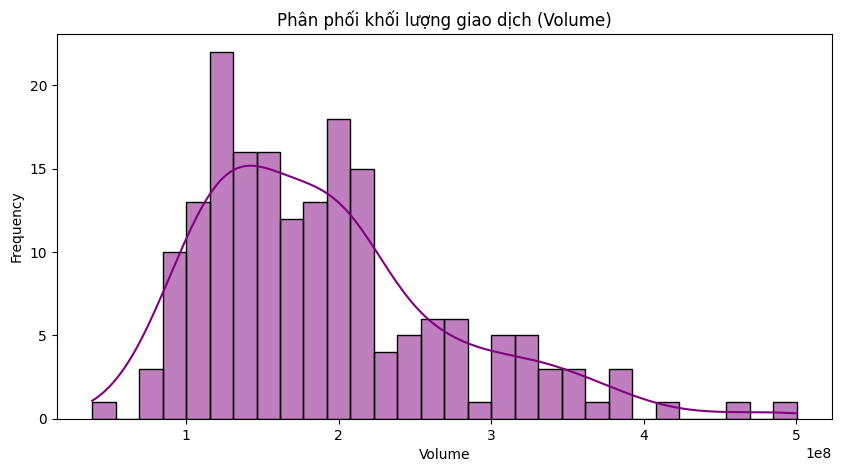

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Volume'], kde=True, color='purple', bins=30)
plt.title("Phân phối khối lượng giao dịch (Volume)")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()


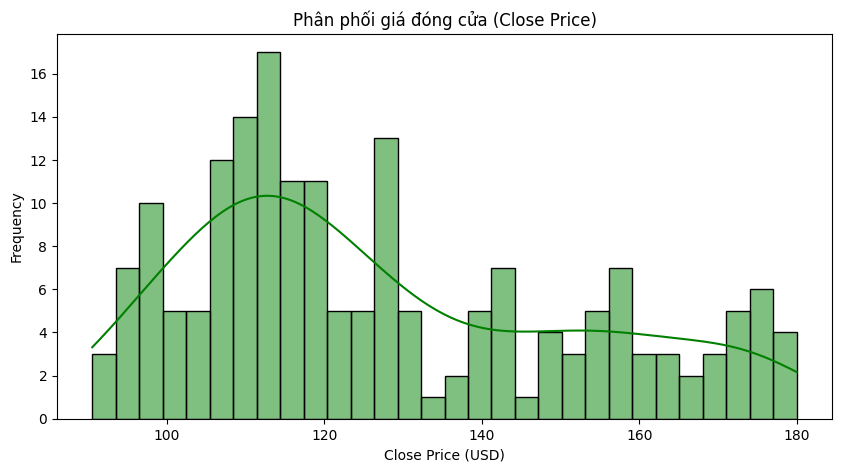

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], kde=True, color='green', bins=30)
plt.title("Phân phối giá đóng cửa (Close Price)")
plt.xlabel("Close Price (USD)")
plt.ylabel("Frequency")
plt.show()


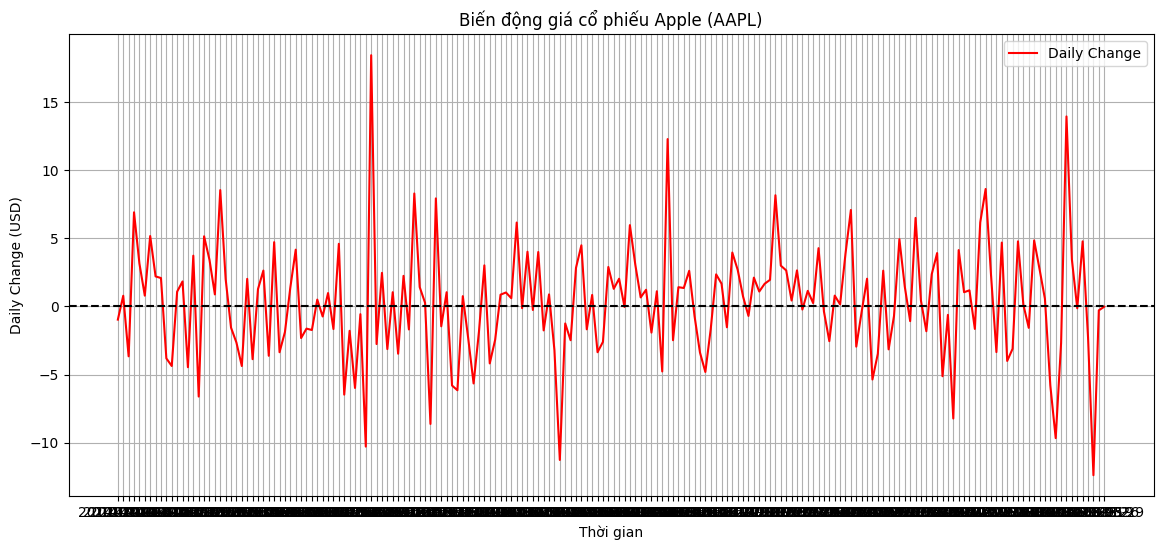

In [11]:
# Tính biến động hằng ngày
df['Daily Change'] = df['Close'] - df['Open']

# Vẽ biểu đồ biến động hằng ngày
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Daily Change'], label='Daily Change', color='red')
plt.title("Biến động giá cổ phiếu Apple (AAPL)")
plt.xlabel("Thời gian")
plt.ylabel("Daily Change (USD)")
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


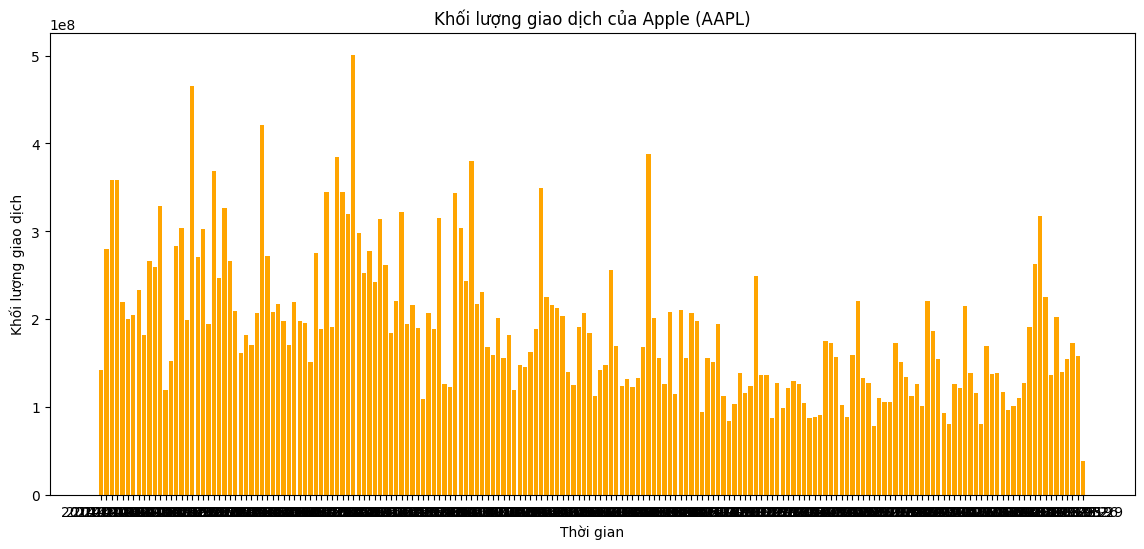

In [12]:
# Biểu đồ khối lượng giao dịch
plt.figure(figsize=(14, 6))
plt.bar(df['Date'], df['Volume'], color='orange')
plt.title("Khối lượng giao dịch của Apple (AAPL)")
plt.xlabel("Thời gian")
plt.ylabel("Khối lượng giao dịch")
plt.show()


## 2.2

In [13]:
# Chuyển đổi cột 'Close' sang kiểu float (nếu cần)
df['Close'] = df['Close'].astype(float)

# Tính toán tỷ suất sinh lợi r_t
df['Return'] = df['Close'].pct_change()

# Hiển thị DataFrame với cột "Return"
print(df.head(10))

         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
1  2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2  2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
3  2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
4  2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   
5  2014-11-03  108.220001  110.300003  107.720001  109.010002  102.328766   
6  2014-11-10  109.019997  114.190002  108.400002  114.180000  107.646675   
7  2014-11-17  114.269997  117.570000  113.300003  116.470001  109.805626   
8  2014-11-24  116.849998  119.750000  116.620003  118.930000  112.124863   
9  2014-12-01  118.809998  119.250000  111.269997  115.000000  108.419746   

      Volume  Daily Change    Return  
0  142718700     -0.969993       NaN  
1  280258200      0.780006  0.011142  
2  358539800     -3.660004 -0.03037

In [14]:
# Loại bỏ các giá trị NaN trong cột "Return"
df.dropna(subset=['Return'], inplace=True)

print(df.head(10))


          Date        Open        High         Low       Close   Adj Close  \
1   2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2   2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
3   2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
4   2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   
5   2014-11-03  108.220001  110.300003  107.720001  109.010002  102.328766   
6   2014-11-10  109.019997  114.190002  108.400002  114.180000  107.646675   
7   2014-11-17  114.269997  117.570000  113.300003  116.470001  109.805626   
8   2014-11-24  116.849998  119.750000  116.620003  118.930000  112.124863   
9   2014-12-01  118.809998  119.250000  111.269997  115.000000  108.419746   
10  2014-12-08  114.099998  114.849998  109.349998  109.730003  103.451294   

       Volume  Daily Change    Return  
1   280258200      0.780006  0.011142  
2   358539800     -3.660004 -0.030378  
3   358532900      6.

In [15]:
# Tạo DataFrame mới chỉ chứa cột "Date" và "Return"
df_return = df[['Date', 'Return']].copy()

# Lưu DataFrame "Return" thành file CSV
df_return.to_csv("apple_stock_return.csv", index=False)

print(df_return.head())


         Date    Return
1  2014-10-06  0.011142
2  2014-10-13 -0.030378
3  2014-10-20  0.077301
4  2014-10-27  0.026421
5  2014-11-03  0.009352


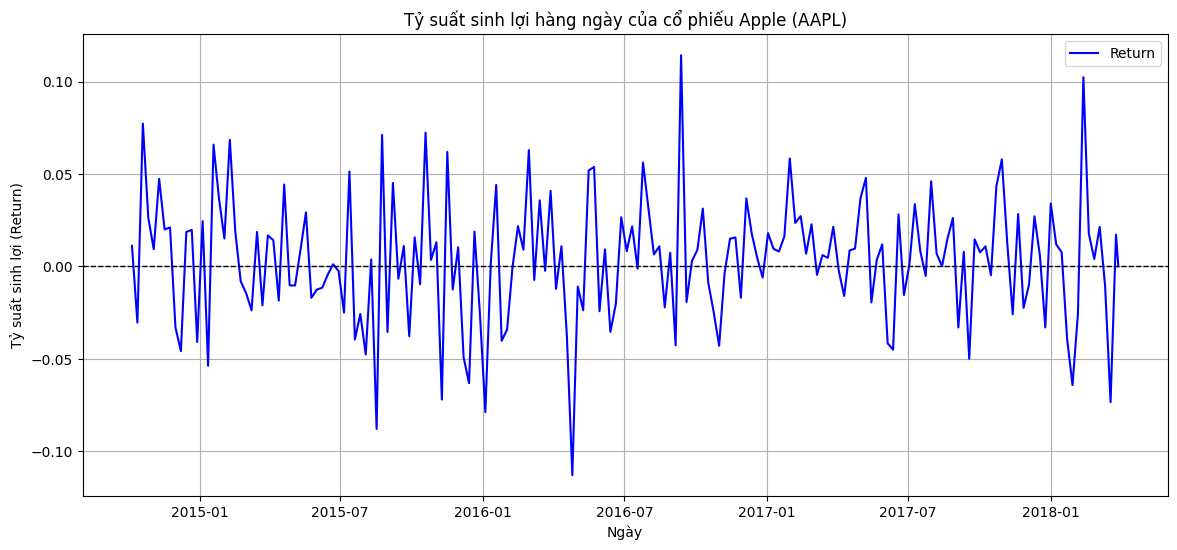

In [16]:
# Chuyển đổi cột "Date" sang kiểu datetime
df_return['Date'] = pd.to_datetime(df_return['Date'])

# Vẽ biểu đồ tỷ suất sinh lợi
plt.figure(figsize=(14, 6))
plt.plot(df_return['Date'], df_return['Return'], label='Return', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Tỷ suất sinh lợi hàng ngày của cổ phiếu Apple (AAPL)")
plt.xlabel("Ngày")
plt.ylabel("Tỷ suất sinh lợi (Return)")
plt.legend()
plt.grid(True)
plt.show()


## 2.3

In [17]:
# Ngày có Return cao nhất
best_day = df.loc[df['Return'].idxmax()]
print("Ngày có Return cao nhất:")
print(best_day[['Date', 'Return']])

# Ngày có Return thấp nhất
worst_day = df.loc[df['Return'].idxmin()]
print("\nNgày có Return thấp nhất:")
print(worst_day[['Date', 'Return']])


Ngày có Return cao nhất:
Date      2016-09-12
Return      0.114322
Name: 102, dtype: object

Ngày có Return thấp nhất:
Date      2016-04-25
Return     -0.112983
Name: 82, dtype: object


## 2.4

In [18]:
std_return = df['Return'].std()
print(f"Độ lệch chuẩn của Return toàn bộ dữ liệu: {std_return}")


Độ lệch chuẩn của Return toàn bộ dữ liệu: 0.03400857234326615


In [21]:
# Lọc dữ liệu năm 2016
df['Date'] = pd.to_datetime(df['Date'])
df_2016 = df[df['Date'].dt.year == 2016]

std_return_2016 = df_2016['Return'].std()
print(f"Độ lệch chuẩn của Return trong năm 2016: {std_return_2016}")


Độ lệch chuẩn của Return trong năm 2016: 0.036706865059112054


# 3. Visualization

## 3.1

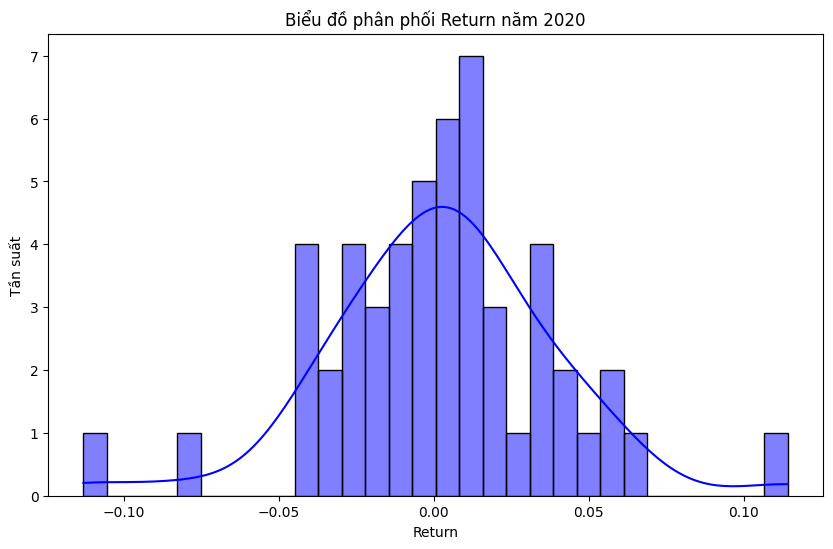

In [22]:
# Vẽ biểu đồ phân phối
plt.figure(figsize=(10, 6))
sns.histplot(df_2016['Return'], kde=True, color='blue', bins=30)
plt.title("Biểu đồ phân phối Return năm 2016")
plt.xlabel("Return")
plt.ylabel("Tần suất")
plt.show()

## 3.2

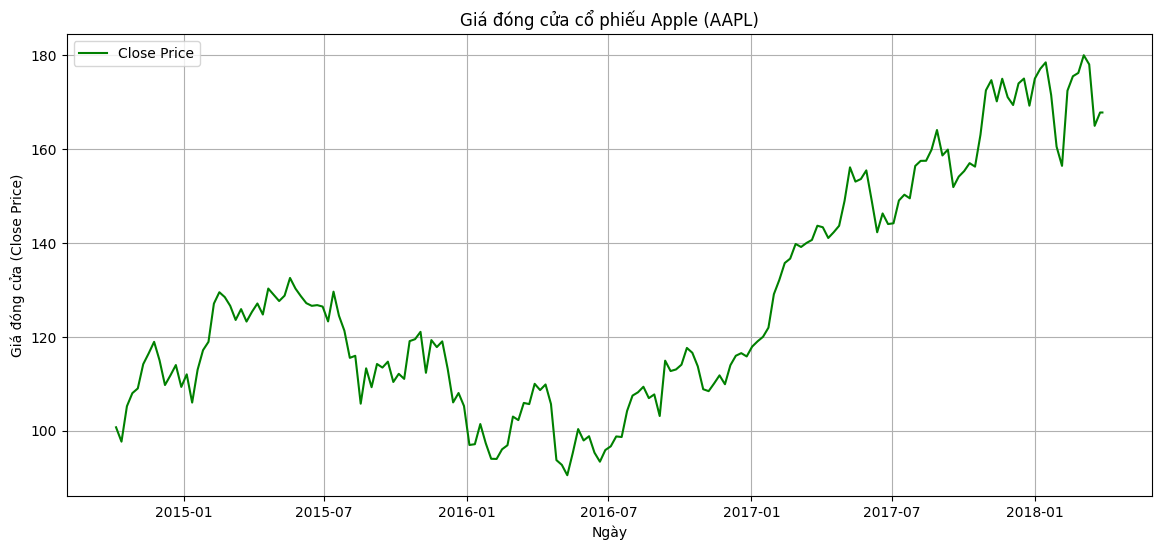

In [23]:
# Vẽ biểu đồ giá Close
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='green')
plt.title("Giá đóng cửa cổ phiếu Apple (AAPL)")
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa (Close Price)")
plt.legend()
plt.grid(True)
plt.show()
